In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [2]:
mydata = pd.read_excel("Bhakt_RAP.xlsx")
mydata
mydata.info()
mydata = mydata.drop(['Name'],axis=1)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         1305 non-null   object
 1   Comment      1305 non-null   object
 2   Time         1305 non-null   object
 3   Likes        1305 non-null   int64 
 4   Reply Count  1305 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 51.1+ KB


In [3]:
mydata.tail()
mydata['Time'].astype(str)
mydata['Time'] = pd.to_datetime(mydata['Time'])


In [4]:

datetimes = pd.to_datetime(mydata['Time'])

mydata['month'] = datetimes.dt.month

mydata['month']=mydata['month'].astype(str)

mydata['day'] = datetimes.dt.day


In [5]:
mydata.info()
mydata.head()

mydata['month'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Comment      1305 non-null   object             
 1   Time         1305 non-null   datetime64[ns, UTC]
 2   Likes        1305 non-null   int64              
 3   Reply Count  1305 non-null   int64              
 4   month        1305 non-null   object             
 5   day          1305 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(3), object(2)
memory usage: 61.3+ KB


6     369
5     171
3     126
4     108
11    106
8      82
1      74
7      72
2      71
12     55
10     37
9      34
Name: month, dtype: int64

<AxesSubplot:>

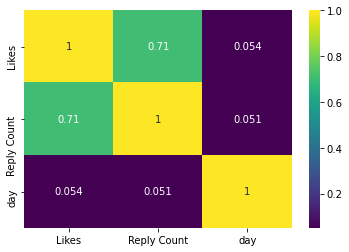

In [6]:
sns.heatmap(mydata.corr(), annot=True,  cmap="viridis")

C:\Users\officeuser\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='Reply Count'>

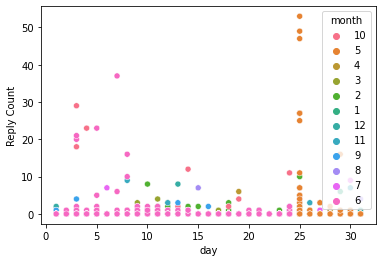

In [7]:
sns.scatterplot('day','Reply Count',data=mydata,hue='month')


In [8]:
mydata["Comment"]= mydata["Comment"].str.lower()
cc = str(mydata["Comment"])
cc

'0       ►if you feel my work is important support the ...\n1           sir pls make video on congress toolkit leaked\n2                                               owsem sir\n3       united nations of asia  (india, china, russia,...\n4       hare krishna hare krishna krishna krishna hare...\n                              ...                        \n1300                                         loved it ! 🥰\n1301    request to all true indian bhakt<br>let&#39;s ...\n1302                         islam is cancer for humanity\n1303                                      भारत माता की जय\n1304                                         awesome!! 🙏🙏\nName: Comment, Length: 1305, dtype: object'

In [9]:
from bs4 import BeautifulSoup
def strip_html_tags(cc):
    soup = BeautifulSoup(cc, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text


In [10]:
#remove accented characters
import unicodedata
def remove_accented_chars(cc):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text



In [11]:
import nltk
from nltk.tokenize import word_tokenize
word_tk = word_tokenize(cc)
from nltk.corpus import stopwords
sw = nltk.corpus.stopwords.words('english')
newStopWords = [":","br","?","#",",", ".", "-", "&","39",")",":","<",">","!",";","/","...", '’','1','0','►if']
for i in newStopWords:
    sw.append(i)
filtered_words = [w for w in word_tk if not w in sw]

In [12]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

port_stem = PorterStemmer()
stemmed_words = []

for w in filtered_words:
    stemmed_words.append(port_stem.stem(w))
    stemmed_words = []

<FreqDist with 51 samples and 57 outcomes>


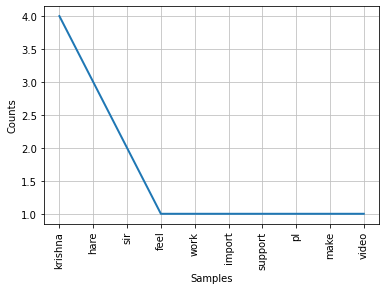

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [13]:
for w in filtered_words:
    stemmed_words.append(port_stem.stem(w))
from nltk.probability import FreqDist
fd = FreqDist(stemmed_words)
print(fd)
fd.plot(10, cumulative = False)